In [1]:
##Get them stats in here
import numpy as np 
import pandas as pd 
from scipy import stats
import statsmodels.api as sm
import matplotlib.pylab as plt 
from patsy import dmatrices
import seaborn as sns


C:\Users\zacha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# In Class Regression Example 2: Remember the Titans


In [2]:

filepath = '../Data/clean_titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


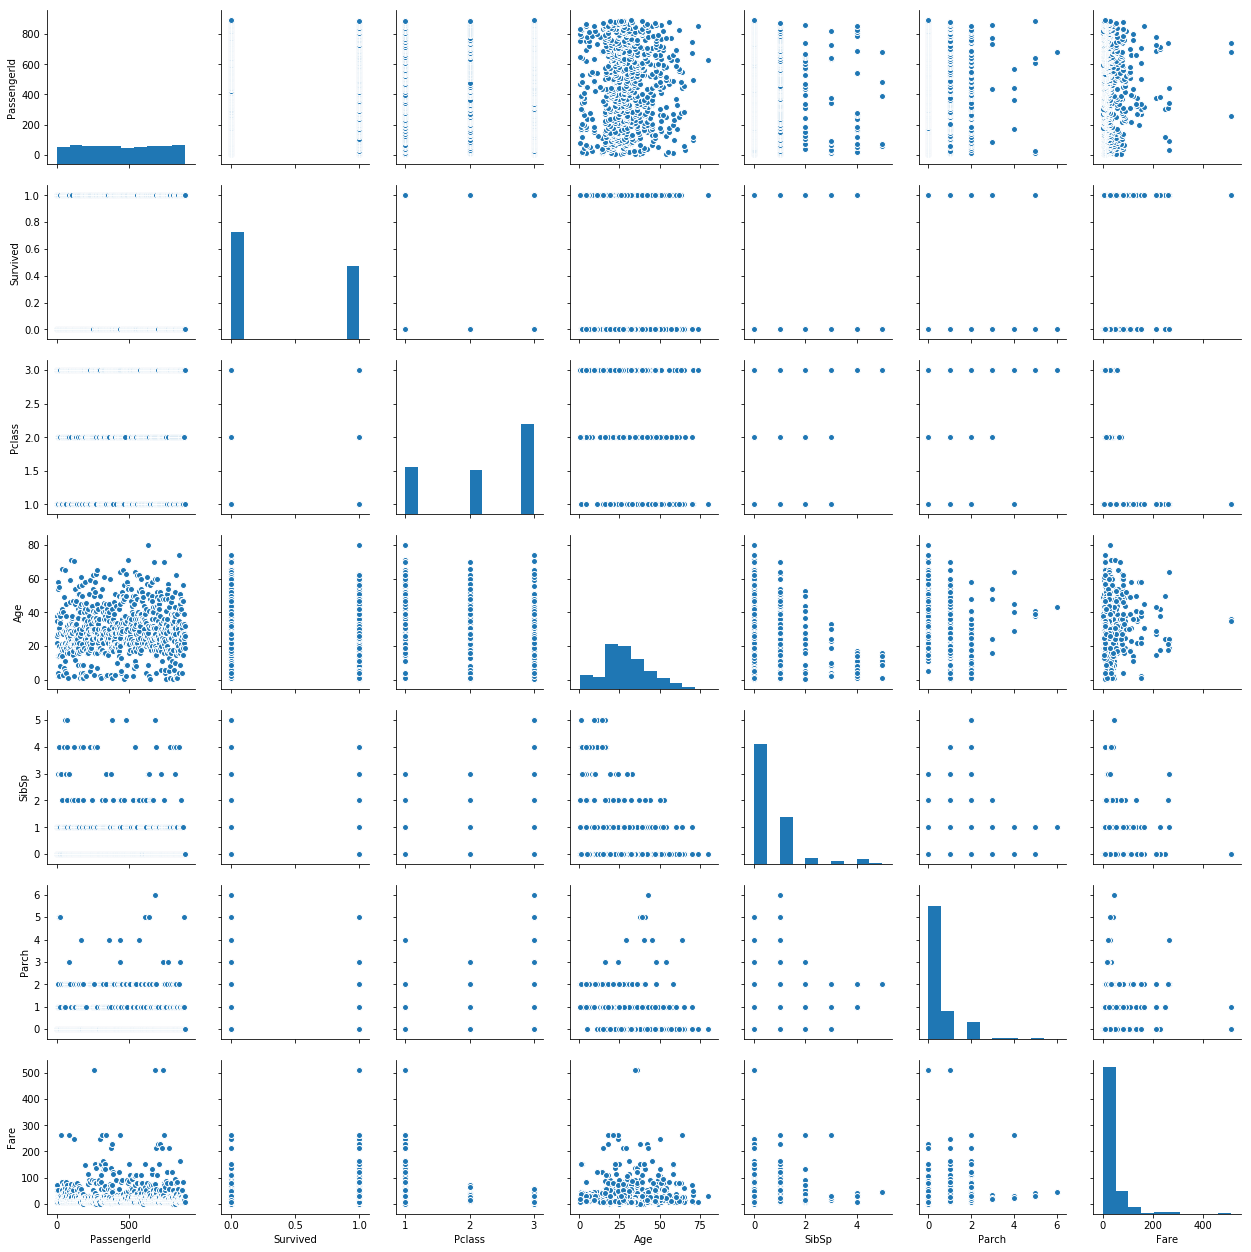

In [3]:
sns.pairplot(df)

Not a ton to comment on here, but it's clear that fare and passenger class are *related* but not identical.  Pairs plots are pretty tough for showing categorical data, so a better plan might have been to make box plots of the ages/fares for **within** each category of survived, passenger class, and Sex.

# Make a Simple Linear Model


In [4]:
y, X = dmatrices('Survived ~ Pclass', data=df, return_type='dataframe')
slr=sm.OLS(y, X).fit()
slr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.16e-23
Time:                        16:25:41   Log-Likelihood:                -455.96
No. Observations:                 714   AIC:                             915.9
Df Residuals:                     712   BIC:                             925.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8778      0.049     17.926      0.000       0.782       0.974
Pclass        -0.2109      0.021    -10.285      0.000      -0.251      -0.171
==============================================================================
Omnibus:                     1152.652   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.627
Skew:                           0.333   Prob(JB):                     2.52e-14
Kurtosis:                       1.711   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2 issues: this is a linear model, which we shouldn't use!  Also, it's only giving us a linear fit for passenger class... not treating the 3 classes as dintinct.  How do we fix this?

In [5]:
pd.get_dummies(df['Pclass'])
#Better!

pd.get_dummies(df['Pclass'], drop_first=True)

#recall that ONE of the three classes will be "folded into" the intercept.

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
5,0,0
6,0,1
7,0,1
8,1,0
9,0,1


                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     53.17
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           3.01e-22
Time:                        16:25:42   Log-Likelihood:                -455.65
No. Observations:                 714   AIC:                             917.3
Df Residuals:                     711   BIC:                             931.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6559      0.034     19.488      0.0

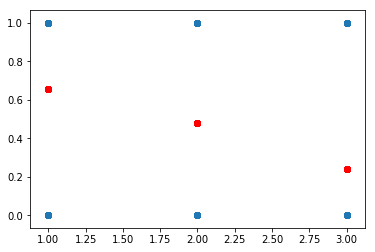

In [6]:
X=pd.get_dummies(df['Pclass'], drop_first=True)
X=sm.add_constant(X)
slr=sm.OLS(df['Survived'], X).fit()
print(slr.summary()) #nice!
plt.scatter(df['Pclass'],df['Survived']) #not so nice, we can't visualize this!
plt.scatter(df['Pclass'],slr.fittedvalues, color='red') #not so nice, we can't visualize this well!


### Results:

Baseline survival rate is the constant, and reflects passengers in class 1.  65.6\%.  

Coefficient "2" is the *adjustment* from baseline for class 2.  It's 17.6% *lower*, for a predicted value of 48%.

Coefficient "3" is the *adjustment* from baseline for class 3.  It's 41.6% *lower*, for a predicted value of 24%.

### Logistic Regression

Let's do better!  Here's a logistic regression instead.  Now the cofficients are measured in that transformed log-odds space, but we should do better interpreting the results.

In [7]:
X=pd.get_dummies(df['Pclass'], drop_first=True)
X=sm.add_constant(X)

logreg=sm.Logit(df['Survived'], X).fit()
logreg.summary2()

Optimization terminated successfully.
         Current function value: 0.609111
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   5.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.098   
Date:               2020-12-07 16:25 AIC:              875.8103
No. Observations:   714              BIC:              889.5229
Df Model:           2                Log-Likelihood:   -434.91 
Df Residuals:       711              LL-Null:          -482.26 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
const    0.6451     0.1543    4.1799   0.0000    0.3426    0.9476
2       -0.7261     0.2168   -3.3500   0.0008   -1.1509   -0.3013
3       -1.8009     0.1982   -9.0855   0.0000   -2.1894   -1.4124
===============================================================

"""

Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4
                        Results: Logit
Model:              Logit            No. Iterations:   4.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.004   
Date:               2020-12-07 16:25 AIC:              964.2284
No. Observations:   714              BIC:              973.3702
Df Model:           1                Log-Likelihood:   -480.11 
Df Residuals:       712              LL-Null:          -482.26 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
const   -0.0567     0.1736   -0.3268   0.7438   -0.3969    0.2835
Age     -0.0110     0.0053   -2.0570   0.0397   -0.0214   -0.0005



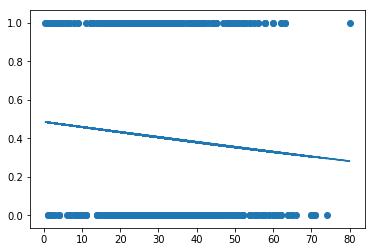

In [8]:
#How about AGE?
X=df['Age']
X=sm.add_constant(X)

logreg2=sm.Logit(df['Survived'], X).fit()
print(logreg2.summary2())
plt.scatter(df['Age'],df['Survived'] )
plt.plot(df['Age'], [1/(1+np.exp(.0567+.0110*x)) for x in df['Age']])

Now we have a model that can predict survival rate as a function of age!  Using logistic regression instead of ANOVA when the predictor and the response were both categorical didn't really help us much.  But now that we have a continuous predictor and a probability-based response, logistic classifications give us a more useful result!

A full model might combine these.  But we also should remember that **class** and **sex** interacted.  The effect of sex seemed to be even more pronounced in the upper two decks than the lowest deck.  The dmatrices syntax gives us a nice way to create a new variable for the different ways that something like this could play out, and creates a matrix who has rows for:

- Are they class=3?
- Are they class=2? (class 1 is still baseline)
- Are they male?  (female is baseline)
- Are they BOTH male and class=2?
- Are they BOTH male and class=3?

This is a little ugly, but this way we get 6 distinct groups for the actual 6 possibilities: 3 classes **times** 2 sexes in the data set.  The baseline becomes a class=1 female and every other observation gets anywhere from 1 to 3 of the other ceofficients are modifiers!

In [9]:
#How about a full model?
passclass=pd.get_dummies(df['Pclass'], drop_first=True)
ismale=pd.get_dummies(df['Sex'], drop_first=True, columns=['M'])
age=df['Age']
surv=df['Survived']
y, X = dmatrices('surv ~ age+passclass*ismale', return_type="dataframe")

logreg3=sm.Logit(df['Survived'], X).fit()
print(logreg3.summary2())


Optimization terminated successfully.
         Current function value: 0.429570
         Iterations 7
                          Results: Logit
Model:                Logit             No. Iterations:    7.0000  
Dependent Variable:   Survived          Pseudo R-squared:  0.364   
Date:                 2020-12-07 16:25  AIC:               627.4267
No. Observations:     714               BIC:               659.4228
Df Model:             6                 Log-Likelihood:    -306.71 
Df Residuals:         707               LL-Null:           -482.26 
Converged:            1.0000            Scale:             1.0000  
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            4.9099   0.6828  7.1909 0.0000  3.5716  6.2481
age                 -0.0419   0.0082 -5.1239 0.0000 -0.0580 -0.0259
passclass[0]        -1.1604   0.7340 -1.5

In [10]:
dir(logreg3)

# print('Correct Zeros': np.sum(df['Age']==0 && logreg3.predict()<.5)))
died=df['Survived']==0
surv=df['Survived']==1
preddied=logreg3.predict()<.50
predsurv=logreg3.predict()>.50
print('Correct Death Prediction:', np.sum([died & preddied]))
print('Death Prediction on survivor', np.sum([surv & preddied]))
print('Correct Surv Prediction:', np.sum([surv & predsurv]))
print('Survived Prediction on dead', np.sum([died & predsurv]))

print((386+182)/(386+108+182+38))

Correct Death Prediction: 386
Death Prediction on survivor 108
Correct Surv Prediction: 182
Survived Prediction on dead 38
0.7955182072829131


On the Titanic exercise way back from nb01, students in the past have often managed to nudge just above 80% by adding some pretty detailed cutoffs that were more complicted than just linear (or sigmoid!) treatments.  But we can now get to 80% doing just the simpliest of categorical plus continuous models.  Not bad, and we're probably not overfitting by too much either!

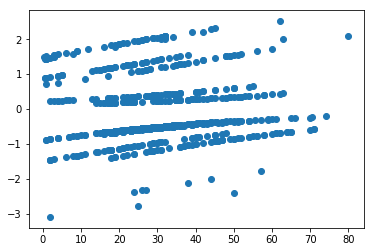

In [11]:
plt.scatter(age,logreg3.resid_dev) #Age residuals (in log-odds space, not in data space!)